In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (Dense, 
                                     BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten)


In [2]:
def get_images(link_to_dataset):
    IMG_WIDTH=224
    IMG_HEIGHT=224
    img_data_2D =[]
    class_ =[]
    nd_image_array =[]

    for folder in os.listdir(link_to_dataset):
        for file in os.listdir(os.path.join(link_to_dataset,folder)):
            image_path = os.path.join(link_to_dataset, folder, file)
            image = Image.open(image_path).resize((IMG_WIDTH,IMG_HEIGHT)).convert('RGB')
            # convert image to numpy array
            image_data = np.array(image)
            image_ = np.array(image)
            flat_image= image_.flatten()
            #image = image.astype('float32')
            
            class_.append(folder)
            img_data_2D.append(flat_image)
            nd_image_array.append(image_data)

            # for i in range(5):
            #     #img=mpimg.imread(image)
            #     ax=plt.subplot(1,5,i+1)
            #     ax.title.set_text(file)
    plt.imshow(image)

    return class_, img_data_2D, nd_image_array

In [3]:
def get_model(path):
    model = load_model(path)
    model.make_predict_function()
    return model

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


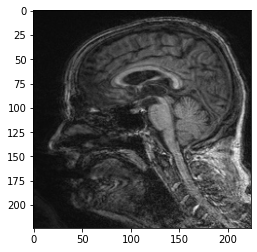

In [7]:
class_names_,img_data_, images_array = get_images(r'/content/drive/MyDrive/datasets/Brain')

In [8]:
y_ = np.array(class_names_)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_)

X_ = np.array(images_array)

In [45]:
y_


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [9]:
X_,y = shuffle(X_, y, random_state=32)
y_cat_ = tf.keras.utils.to_categorical(y, num_classes=1000)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_cat_, test_size=0.20)

In [10]:
path =('/content/drive/MyDrive/datasets/saved_models/mobilenetv1')
mobilenet_model = load_model(path)
mobilenet_model.make_predict_function()
mobilenet_pred = mobilenet_model.predict(X_test_)



In [15]:
y_test_

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
mobilenet_y_pred =[]
for i in range (len(mobilenet_pred)):
    mobilenet_y_pred.append(np.argmax(mobilenet_pred[i]))


y_test =[]
for i in range (len(y_test_)):
    y_test.append(np.argmax(y_test_[i]))


mobilenet y_pred is: [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
y_test is: [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]


In [39]:
import sklearn.metrics
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, mobilenet_y_pred)
print(confusion_matrix)

tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, mobilenet_y_pred).ravel()
print("TN:",tn ," FP:",fp, " FN",fn, " TP:",tp)

[[13 43]
 [ 0 26]]
TN: 13  FP: 43  FN 0  TP: 26


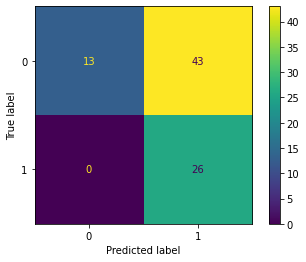

In [40]:
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix)
disp.plot()
plt.show()

In [20]:
path =('/content/drive/MyDrive/datasets/saved_models/mobilenetv2')
mobilenet_model_v2 = load_model(path)
mobilenet_model_v2.make_predict_function()
mobilenet_pred_v2 = mobilenet_model_v2.predict(X_test_)

mobilenet_y_pred_v2 =[]
for i in range (len(mobilenet_pred_v2)):
    mobilenet_y_pred_v2.append(np.argmax(mobilenet_pred_v2[i]))



mobilenet V2 y_pred is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [41]:
print("Mobilenet model version 2 performance:")
confusion_matrix_mv2 = sklearn.metrics.confusion_matrix(y_test, mobilenet_y_pred_v2,)
print(confusion_matrix_mv2)

tn_mv2, fp_mv2, fn_mv2, tp_mv2 = sklearn.metrics.confusion_matrix(y_test, mobilenet_y_pred_v2).ravel()

print("TP:", tp_mv2, " FP:", fp_mv2, " FN:", fn_mv2, " TN", tn_mv2)

Mobilenet model version 2 performance:
[[ 1 55]
 [ 0 26]]
TP: 26  FP: 55  FN: 0  TN 1


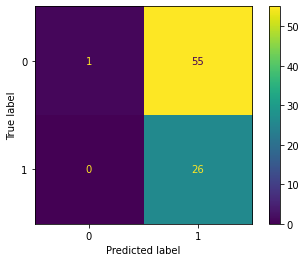

In [35]:
disp_mv2 = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_mv2)
disp_mv2.plot()
plt.show()

In [29]:
path =('/content/drive/MyDrive/datasets/saved_models/resnet101')
resnet101_model = load_model(path)
resnet101_model.make_predict_function()
resnet101_pred = resnet101_model.predict(X_test_)

resnet101_y_pred =[]
for i in range (len(resnet101_pred)):
    resnet101_y_pred.append(np.argmax(resnet101_pred[i]))
    

In [42]:
confusion_matrix_r101 = sklearn.metrics.confusion_matrix(y_test, resnet101_y_pred)
print(confusion_matrix_r101)

tnr1, fpr1, fnr1, tpr1 = sklearn.metrics.confusion_matrix(y_test, resnet101_y_pred).ravel()
print("TN:",tnr1, " TP:",tpr1, " FP:",fpr1, " FN",fnr1)

[[54  2]
 [18  8]]
TN: 54  TP: 8  FP: 2  FN 18


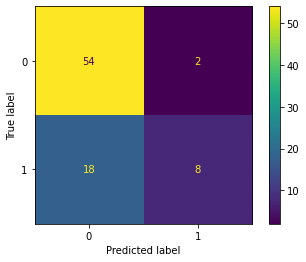

In [43]:
disp_r101 = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_r101)
disp_r101.plot()
plt.show()

According to the outcome above:
Nb: 0 = Normal, 1 =Diseased
*   The resnet101 model can easily diagnose a whether a normal person is normal but poorly diagnoses an infected person correctly since its True negative is at 54 while the TN readings of the other two models is significantly low
*   The mobilenetv1 and v2 models can both diagnose whether a person is infected better than the resnet101 model since they both have True Positive readings of 26 while the True positive of the resnet101 is at 8
*   The mobilenetv1 model however has a higher True negative value of 13 compared to mobilenetv2, that means that it can better tell when a person is normal.
*   Considering that the overall aim of the project was to diagnose whether a person is infected with PSP, I would choose the mobilenet V1 model since it has a high TP value meaning it is good at diagnosing an infected person, and it still have the capability to tell whether a patient is healthy though this latter capability needs to be improved by training the model better.
*   The resnet 101 model performed quite poorly in predicting whether a person was infected thus leading to the Mobilenetv1 model being considered best

```

